# __Задачи__
* Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
* Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
* Сколько транзакций завершились ошибкой?
* Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
* Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
* Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
* Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.


# __Описание данных__
Имеются следующие данные:

* date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
* name – имя пользователя
* transaction – статус транзакции
* minute – сколько минут прошло с начала дня

In [101]:
import pandas as pd

import requests
from urllib.parse import urlencode
!pip install wget
import wget

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=5b5609585dab07229ab31b4952fd260b11272a69c7a2672640fa3c38b42f5676
  Stored in directory: c:\users\s9094\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


__Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.__

In [2]:
def get_data(df_url, sep=';'):
    """Функция для загрузки данных и их преобразования в датафрейм"""
    
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    
    # Получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=df_url))
    response = requests.get(final_url)
    download_url = response.json()['href']

    # Загружаем файл и сохраняем его
    df = pd.read_csv(download_url, sep=sep)
    
    return df

In [3]:
transaction_data = get_data('https://disk.yandex.ru/d/OoOH0Nl8Q2RYGw', sep=',')

In [4]:
lst = ['shape', 'miss_data', 'data_types', 'dstats']

In [5]:
def eda(df, lst=lst):
    data = {
            'shape': df.shape,
            'miss_data': df.isna().sum(),
            'data_types': df.dtypes,
            'dstats': df.describe()
            }
    for i in lst:
        print(f"\n{str.capitalize(i)}\n{data[i]}\n")

In [6]:
eda(transaction_data) # пропущенных данных нет, дата имеет тип "object"


Shape
(5315, 3)


Miss_data
date           0
name           0
transaction    0
dtype: int64


Data_types
date           object
name           object
transaction    object
dtype: object


Dstats
                       date           name  transaction
count                  5315           5315         5315
unique                 3373             56            3
top     2020-03-02 00:33:10  Masha_Ozerova  successfull
freq                      6            112         3692



__Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.__

In [7]:
transaction_data.transaction.unique() # уникальных значений

array(['cancelled', 'successfull', 'error'], dtype=object)

In [8]:
transaction_data.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [9]:
ytic=[10, 20, 100, 500, 2500, 5000]

C:\Anaconda\envs\Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transaction', ylabel='count'>

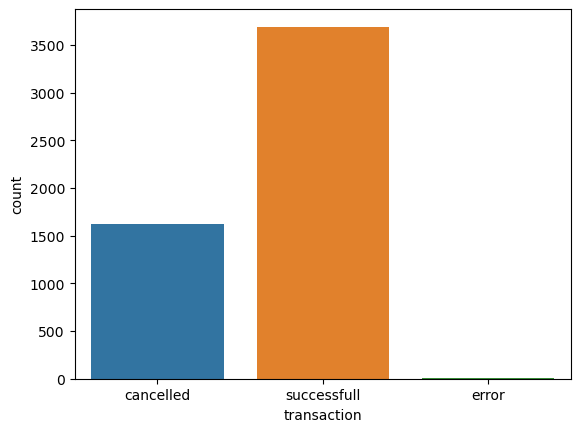

In [10]:
sns.countplot(transaction_data.transaction) # плохо видно количество значений в группе error

__Сколько транзакций завершились ошибкой?__


In [14]:
transaction_data.transaction.value_counts().loc['error'] # всего 4 ошибки

4

__Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull__

__Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где__

__по оси x – число транзакций
по оси y – доля пользователей с таким числом транзакций__

In [64]:
success_trans = (
                transaction_data[transaction_data['transaction'] == 'successfull']
                .groupby('name', as_index=False)['date'].count()
                .rename(columns={'date': 'success_trans'})
)
success_trans.describe()

,success_trans
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [92]:
success_trans.drop(columns=('prc')).head()

,name,success_trans
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


C:\Anaconda\envs\Analysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 2000x1000 with 0 Axes>

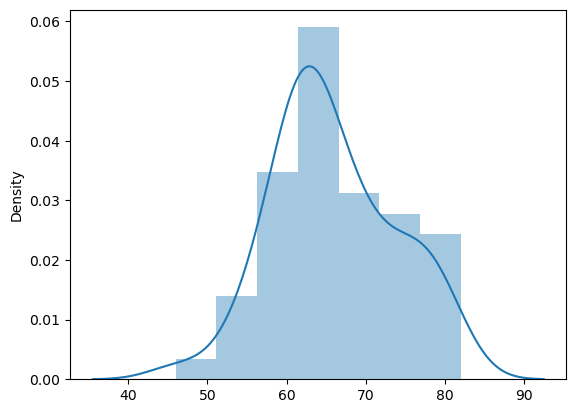

<Figure size 2000x1000 with 0 Axes>

In [87]:
sns.distplot(x=success_trans.success_trans)
plt.figure(figsize=(20,10))

__К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:__

* столбцы – имена пользователей
* строки – минута времени осуществления операции (minute)
* значения – число совершённых операций

In [104]:
transaction_data_updated = (
    pd.read_csv(wget.download('https://stepik.org/media/attachments/lesson/361624/transaction_data_updated.csv'))
)

In [105]:
transaction_data_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [113]:
pivot_data = (
                transaction_data_updated.groupby(['name', 'minute'], as_index=False)
                .agg({'date': 'count'})
                .rename(columns={'date': 'success_trans'})
                .pivot(columns='name', index='minute', values='success_trans')
                .fillna(0)
             )
pivot_data.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
